In [54]:
# a,b,c,f observed d,e unobserved
# a,b,c,d affect x/y
# a,b,c,d,e affect X/Y
# y = a+b+ab+c^2-d

import numpy as np

ay = np.random.normal(size=(100))
ax = np.random.normal(size=(1000))
by = np.random.normal(size=(100))
bx = np.random.normal(size=(1000))
cy = np.random.normal(size=(100))
cx = np.random.normal(size=(1000))
dy = np.random.normal(size=(100))
dx = np.random.normal(size=(1000))
ey = np.random.normal(size=(100))
ex = np.random.normal(size=(1000))
fy = np.random.normal(size=(100))
fx = np.random.normal(size=(1000))

A = np.random.normal(size=(1000))
B = np.random.normal(size=(1000))
AB = np.random.normal(size=(1000))
C2 = np.random.normal(size=(1000))
# C = np.random.normal(size=(1000))
D = np.random.normal(size=(1000))
E = np.random.normal(size=(1000))

AX = np.einsum('n,x->nx', ax, A)
BX = np.einsum('n,x->nx', bx, B)
ABX = np.einsum('n,x->nx', ax*bx, AB)
C2X = np.einsum('n,x->nx', cx*cx, C2)
# CX = np.einsum('n,x->nx', cx, C)
DX = np.einsum('n,x->nx', dx, D)
EX = np.einsum('n,x->nx', ex, E)

# X = AX+BX+CX+DX+EX
X = AX+BX+ABX+C2X+DX+EX

AY = np.einsum('n,x->nx', ay, A)
BY = np.einsum('n,x->nx', by, B)
ABY = np.einsum('n,x->nx', ay*by, AB)
C2Y = np.einsum('n,x->nx', cy*cy, C2)
# CY = np.einsum('n,x->nx', cy, C)
DY = np.einsum('n,x->nx', dy, D)
EY = np.einsum('n,x->nx', ey, E)

# Y = AY+BY+CY+DY+EY
Y = AY+BY+ABY+C2Y+DY+EY

y = ay+by+ay*by+cy*cy-dy
x = ax+bx+ax*bx+cx*cx-dx
print(y)

[-2.90082978  1.73938981  4.2808529  -0.13825963 -1.3823426  -2.07238187
 -0.33814881  0.49609762 -1.38949064  1.23531469  3.29638674 -1.26268564
 -2.00861465  2.27729069 -1.06889954  0.05908289 -0.55638929  6.45401368
  0.69402493 -0.61020761 -1.32349771  0.88675753 -1.85640385 -2.24544841
  6.58168537  0.27139516  0.12462484 -0.70357822  5.02759301  1.35299081
 -0.14192478  5.10358784 -0.16726955 -3.2688316  -0.64187397 -0.03070387
  1.31854569  0.67735515 -0.28925564  1.88645737  2.19755638 -2.9844845
  1.18077365  6.11282167  1.33243793  0.38521472  8.91640154  0.75323384
 -0.0711534   2.33363998 -0.93241489  1.74403418 -2.06464319  0.40695534
  1.93633045 -2.4136679  -1.31158166  1.39937044  0.62836356 -0.6491723
  0.43758633 -1.3509492   2.57887655 -1.59696879  1.74699294 -0.88011837
  0.08315832  1.76721329 -0.01021211  0.82205876 -0.43442514  5.36604024
  4.57189086 -0.7406552  -2.1446734   3.13966132 -0.16789441 -1.33615947
  1.8373144   1.60024904 -1.4802051   0.84009707  1.3

In [55]:
# Make y from Y model

from sklearn.linear_model import Ridge

regYy = Ridge(alpha=100).fit(Y, y)
yhat = regYy.predict(Y)
yhat

array([-2.89776371,  1.73854143,  4.28045318, -0.13698314, -1.37990697,
       -2.06954851, -0.33752621,  0.49586112, -1.38785784,  1.23346299,
        3.29179966, -1.26169519, -2.00635123,  2.27963048, -1.06684614,
        0.05997727, -0.55490528,  6.45082772,  0.69271723, -0.60956246,
       -1.32251517,  0.88567234, -1.85404675, -2.24331524,  6.57035074,
        0.27184904,  0.12726831, -0.70236403,  5.02126617,  1.353314  ,
       -0.14221682,  5.10134151, -0.16709878, -3.26555871, -0.6407754 ,
       -0.02968359,  1.31771594,  0.67705665, -0.28985585,  1.88492517,
        2.19490547, -2.98036394,  1.18166062,  6.10626989,  1.3332852 ,
        0.3861609 ,  8.91208544,  0.75229609, -0.06596124,  2.33274333,
       -0.93031964,  1.74291558, -2.0616835 ,  0.40692647,  1.93416294,
       -2.41068886, -1.30960117,  1.39814602,  0.62764635, -0.6487089 ,
        0.43664502, -1.348769  ,  2.57816854, -1.59181832,  1.74604347,
       -0.87878972,  0.08372451,  1.76709808, -0.01073231,  0.82

In [56]:
# Predict a,b,c,f from X (Y)

from sklearn.linear_model import Lasso

reg_abcf = Ridge(alpha=100).fit(X, np.stack([ax, bx, cx, fx, ax*ax, ax*bx, ax*cx, ax*fx, bx*bx, bx*cx, bx*fx, cx*cx, cx*fx, dx*fx]).T)
# reg_abcf = Ridge(alpha=100).fit(X, np.stack([ax, bx, cx, fx]).T)
abcfhat = reg_abcf.predict(Y)
abcfhat[:5]

array([[-1.15714699, -0.0060956 ,  0.02874884,  0.14325389,  0.97519125,
         0.00705989, -0.09243074, -0.19209059,  0.84912279,  0.12555492,
         0.0309935 ,  0.04376471,  0.02407359,  0.1028405 ],
       [-0.61238129, -0.63008472, -0.20061111, -0.1494604 ,  1.19802808,
         0.38588969,  0.33547321,  0.06271583,  0.95970716, -0.04705785,
         0.03118433,  0.07285945, -0.0619767 ,  0.03009336],
       [-1.3141481 , -0.13824539, -0.04925354,  0.09076112,  1.12134351,
         0.18171411,  0.05908851, -0.05583648,  1.00250124,  0.0709531 ,
         0.12952802,  5.14867191,  0.178313  ,  0.14308134],
       [-1.0295382 , -0.26970388, -0.14327731, -0.04946958,  1.13500319,
         0.27770596,  0.208209  , -0.03724977,  0.9142347 , -0.00546198,
         0.05505866,  0.17175721, -0.02355551,  0.01083333],
       [ 0.38778063, -0.80847942, -0.0909529 , -0.01963553,  1.05409197,
        -0.3135182 ,  0.11238104,  0.05262866,  0.97018759, -0.11589219,
        -0.02955057,  0.06

In [57]:
# Get coefficients of a,b,c,f for y

coef = Ridge(alpha=100).fit(abcfhat, y)
for c in coef.coef_:
    print(c)

0.378356153816528
0.44045743183165625
-0.03166059160658567
-0.02793351438641792
0.05355599005451425
0.2732016389682963
0.01644420143529268
0.07754937313786724
0.04458378245205859
-0.01385210425466971
0.04684484013339046
0.6825462597453643
0.021290137152246993
0.0221534366509318


In [7]:
# Create VAE model

import sys

sys.path.append('/home/anton/Documents/Tulane/Research/demo-vae/pip/src/')

from demovae import DemoVAE

demos = [ax, bx, cx, fx, ax*ax, ax*bx, ax*cx, ax*fx, bx*bx, bx*cx, bx*fx, cx*cx, cx*fx, dx*fx]
demo_types = ['continuous']*len(demos)

vae = DemoVAE(pperiod=200, use_cuda=True, nepochs=5000, latent_dim=20, weight_decay=0, lr=5e-5, loss_rec_mult=1e3,
              loss_pred_mult=100, loss_C_mult=1e4, alpha=10)
vae.fit(X, demos, demo_types)

Fitting auxilliary guidance model for demographic 0 continuous... done
Fitting auxilliary guidance model for demographic 1 continuous... done
Fitting auxilliary guidance model for demographic 2 continuous... done
Fitting auxilliary guidance model for demographic 3 continuous... done
Fitting auxilliary guidance model for demographic 4 continuous... done
Fitting auxilliary guidance model for demographic 5 continuous... done
Fitting auxilliary guidance model for demographic 6 continuous... done
 doneng auxilliary guidance model for demographic 7 continuous...
Fitting auxilliary guidance model for demographic 8 continuous... done
Fitting auxilliary guidance model for demographic 9 continuous... done
Fitting auxilliary guidance model for demographic 10 continuous... done
Fitting auxilliary guidance model for demographic 11 continuous... done
Fitting auxilliary guidance model for demographic 12 continuous... done
Fitting auxilliary guidance model for demographic 13 continuous... done
Convert

DemoVAE(LR_C=100, alpha=10, bsize=1000, latent_dim=20, loss_C_mult=10000.0,
        loss_decor_mult=10, loss_mu_mult=1, loss_pred_mult=100,
        loss_rec_mult=1000.0, lr=5e-05, nepochs=5000, pperiod=200,
        use_cuda=True, weight_decay=0)

In [16]:
for i in range(5):
    ndemos1 = []
    ndemos2 = []
    for d in demos:
        ndemos1.append(np.zeros(len(d)))
        ndemos2.append(np.zeros(len(d)))

    c = 6
    ndemos2[11] = c*c*np.ones(len(X))
    X1 = vae.transform(len(X), ndemos1, demo_types)
    X2 = vae.transform(len(X), ndemos2, demo_types)
    y1 = regYy.predict(X1)
    y2 = regYy.predict(X2)
    print(np.sum(y2-y1)/len(X))

-0.990936965992669
-0.9380759588569471
-0.9847063599878229
-0.9856905106512392
-1.0488301816850971


In [14]:
len(demos)

14

In [76]:
vals = '-0.05312139068	-0.03566246842	-0.03885258626	-0.03791446669	-0.05149236599'
vals = [float(v) for i,v in zip(range(5), vals.split())]
absc = np.array([[v] for v in [0.5, 1, 1.5, 2, 2.5]])

reg = Ridge(alpha=0).fit(absc, vals)
print(reg.coef_[0])

0.00020121022200000064


/tmp/ipykernel_128383/252343453.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


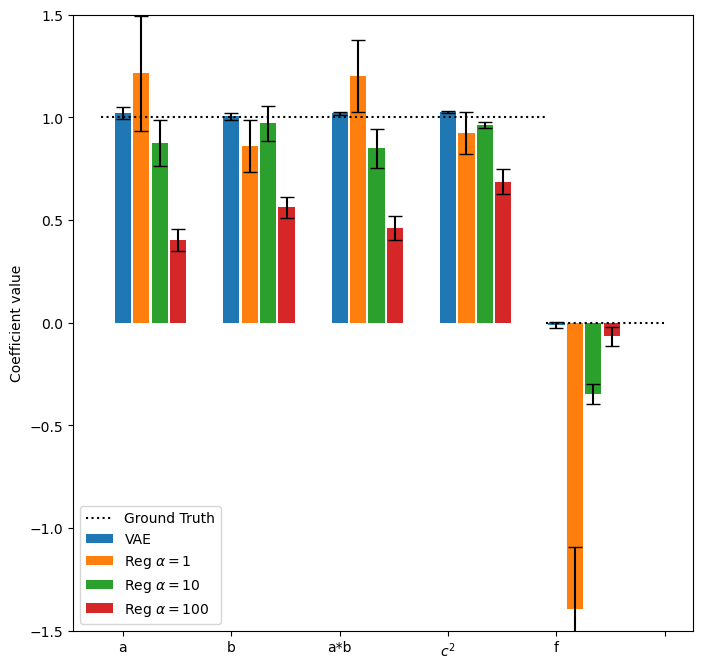

In [135]:
import matplotlib.pyplot as plt

vae_stuff = [1.020668995, 1.00422373, 1.018932711, 1.02709847, -0.01040522881]
vae_errs = [0.03031483977, 0.0150509222, 0.007226802652, 0.003767308256, 0.01474297591]
ticks = np.arange(0,5)
labels = ['', 'a', 'b', 'a*b', '$c^2$', 'f']

alpha1_stuff = [1.214928372, 0.8603755959, 1.20151115, 0.9256126556, -1.395471027]
alpha1_errs = [0.2801298942, 0.127351477, 0.1730589265, 0.1026164524, 0.305341553]

alpha10_stuff = [0.8753601626, 0.970418808, 0.848445819, 0.9625237525, -0.3462458949] 
alpha10_errs = [0.1121831824, 0.08691340647, 0.09702837485, 0.01666317196, 0.04825578545]

alpha100_stuff = [0.4025130036, 0.5615984615, 0.4631057929, 0.6868878347, -0.06697235815]
alpha100_errs = [0.0539084285, 0.05210501009, 0.05849013544, 0.05936198564, 0.04644516097]

fig, ax = plt.subplots(1,1,figsize=(8,8))

ax.bar(ticks, vae_stuff, yerr=vae_errs, capsize=5, label='VAE', width=0.15)
ax.bar(ticks+0.17, alpha1_stuff, yerr=alpha1_errs, capsize=5, label='Reg $\\alpha=1$', width=0.15)
ax.bar(ticks+0.34, alpha10_stuff, yerr=alpha10_errs, capsize=5, label='Reg $\\alpha=10$', width=0.15)
ax.bar(ticks+0.51, alpha100_stuff, yerr=alpha100_errs, capsize=5, label='Reg $\\alpha=100$', width=0.15)
ax.plot([-0.2,3.9],[1,1],linestyle='dotted',color='black',label='Ground Truth')
ax.plot([3.9,5],[0,0],linestyle='dotted',color='black')
ax.legend()
ax.set_xticklabels(labels)
ax.set_ylabel('Coefficient value')
ax.set_ylim([-1.5, 1.5])

fig.show()
fig.savefig('/home/anton/Documents/Yale/MedicalImageAnalysis/simulation_bars.pdf')

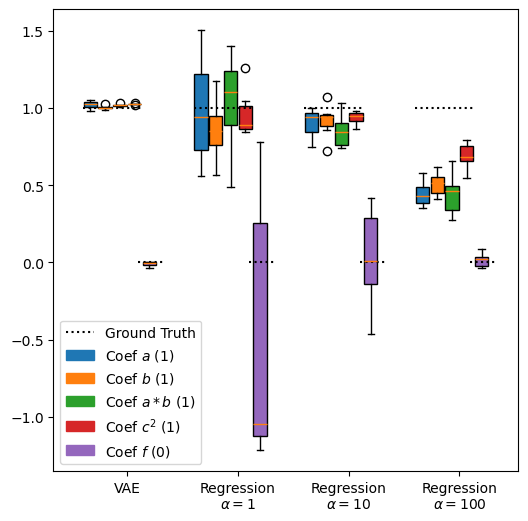

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

vae_a = [1.051774781,0.9967682963,1.028815353,0.9817446881,1.044241858,1.020668995]
a_1 = [0.94393088,1.50337491,1.197479325,1.243250646,0.577752932,0.8719256353,0.5564327622]
a_10 = [0.9415236483,0.7458322623,0.9387245772,0.9977938931,0.989549865,0.8678853651,0.8182268239]
a_100 = [0.3523789238,0.3956261831,0.4595339039,0.5145662172,0.4308691568,0.5781436445,0.3783561538]

vae_b = [0.9863299269,0.9976246434,1.007588689,1.002380697,1.027194694]
b_1 = [0.9914482424,0.8525746145,0.7371039309,0.7819090209,0.5637253971,0.9045534,1.170968282]
b_10 = [0.9382829999,1.06882387,0.9041495539,0.8553027769,0.9619561783,0.9411410713,0.7217137692]
b_100 = [0.5148691579,0.6177840094,0.5521422173,0.5480331147,0.4605939869,0.4122536293,0.4404574318]

vae_ab = [1.031236972,1.013447628,1.015514627,1.01946361,1.015000717]
ab_1 = [1.401335537,1.1030322,1.100165727,1.286014444,0.4866330979,1.192990239,0.6773527678]
ab_10 = [0.7426501603,0.869406768,0.9332805305,0.7805177909,0.7452241074,1.030039843,0.8421372784]
ab_100 = [0.4653552809,0.4035233651,0.5204387328,0.6536760872,0.4626763242,0.2779234019,0.273201639]

vae_c2 = [1.031221669,1.020931786,1.028136895,1.027882322,1.027319679]
c2_1 = [1.044061846,0.8691227033,0.8636534175,0.8906127662,0.9814399164,0.8453537988,1.25629367]
c2_10 = [0.9485884132,0.9580015989,0.9809812454,0.8922735504,0.8649692211,0.9726196425,0.9371157153]
c2_100 = [0.6364279688,0.6719406997,0.7522948356,0.7519277682,0.546650371,0.7931168496,0.6825462597]

vae_f = [-0.01478550844,-0.03388437356,-0.006116648396,0.002559176152,0.000201210222]
f_1 = [-1.045978196,-1.07394408,0.7578630505,-1.213671855,0.7768437991,-0.2507689027,-1.177043337]
f_10 = [-0.2491577053,0.1565788876,0.4128203296,-0.4623953554,0.4188438225,0.007240828649,-0.02492173041]
f_100 = [0.08646242295,0.03891975969,-0.0214068377,0.02282399005,0.03591659315,-0.03730586601,-0.02793351439]

data = [vae_a, vae_b, vae_ab, vae_c2, vae_f, a_1, b_1, ab_1, c2_1, f_1,
       a_10, b_10, ab_10, c2_10, f_10, a_100, b_100, ab_100, c2_100, f_100]
delta = np.array([0,0.2,0.4,0.6,0.8])
groups = np.array([0,1.5,3,4.5])
positions = []
for g in groups:
    for p in g+delta:
        positions.append(p)
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']*4

fig, ax = plt.subplots(1,1,figsize=(6,6))

bplot = ax.boxplot(data, positions=positions, widths=0.18, patch_artist=True)

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

gtruth, = ax.plot([-0.1,0.7],[1,1],linestyle='dotted',color='black',label='Ground Truth')
ax.plot([0.65,1],[0,0],linestyle='dotted',color='black')
for g in groups[1:]:
    ax.plot([g-0.1,g+0.7],[1,1],linestyle='dotted',color='black')
    ax.plot([g+0.65,g+1],[0,0],linestyle='dotted',color='black')

ax.set_xticks(groups+0.5,['VAE', 'Regression\n$\\alpha=1$', 'Regression\n$\\alpha=10$', 'Regression\n$\\alpha=100$'])

a_patch = mpatches.Patch(color='tab:blue', label='Coef $a$ (1)')
b_patch = mpatches.Patch(color='tab:orange', label='Coef $b$ (1)')
ab_patch = mpatches.Patch(color='tab:green', label='Coef $a*b$ (1)')
c2_patch = mpatches.Patch(color='tab:red', label='Coef $c^2$ (1)')
f_patch = mpatches.Patch(color='tab:purple', label='Coef $f$ (0)')
handles = [gtruth, a_patch, b_patch, ab_patch, c2_patch, f_patch]
ax.legend(handles=handles)

fig.show()
fig.savefig('/home/anton/Documents/Yale/MedicalImageAnalysis/simulation_bplot.pdf')

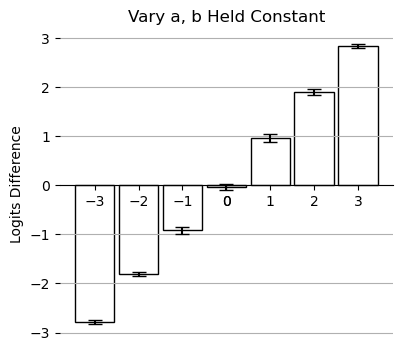

In [5]:
import numpy as np
import matplotlib.pyplot as plt

logits = [-2.789271271,-1.813806814,-0.9213283017,-0.03148667692,0.9529060178,1.897078826,2.840093461]
errs = [0.01591243044,0.01774556107,0.03063871039,0.02804653842,0.03656056802,0.02793178858,0.01657752636]
errs = np.array(errs)*10
diffs = [-3,-2,-1,0,1,2,3]

def showfig(logits, diffs, errs, field, color=None):
    fig, ax = plt.subplots(figsize=(0.3+(len(diffs)+1)*0.5,4))

    errs = np.array(errs)/np.sqrt(20)

    kwargs = {'edgecolor': 'black', 'color': 'white'}
    # if color is not None:
    #     kwargs = {'edgecolor': 'black'}
    p = ax.bar(diffs, logits, width=0.9*(diffs[0]-diffs[1]), yerr=errs, capsize=5, **kwargs)
    # ax.bar_label(p, padding=8, labels=[getsig(logits[i], errs[i]) for i in range(len(logits))])
    ax.set_xticks(diffs + [0])
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # ax.set_ylim([-3, 3])
    ax.set_ylabel('Logits Difference')
    ax.set_title(f'{field}')
    # ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position('zero')

    ax.grid(True, axis='y')
    
    fig.show()
    name = field.replace(' ', '_')
    fig.savefig(f'/home/anton/Documents/Yale/MedicalImageAnalysis/simul_delta_{name}.pdf')

showfig(logits, diffs, errs, 'Vary a, b Held Constant')

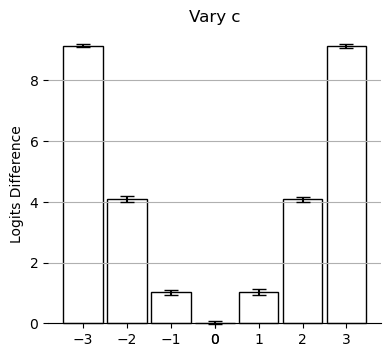

In [6]:
logits = [9.138378651,4.089127989,1.020319603,0.02004473883,1.03753944,4.081379249,9.126179492]
errs = [0.02184295973,0.03823031572,0.03581694153,0.0205156991,0.04217587089,0.03590738167,0.02914897303]
errs = np.array(errs)*10

showfig(logits, diffs, errs, 'Vary c', color='tab:orange')

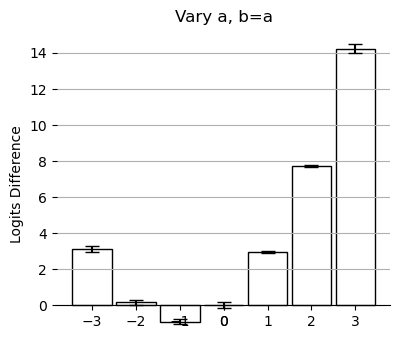

In [7]:
logits = [3.108954607,0.1549331241,-0.9029911707,0.0194574276,2.964081931,7.710855115,14.21356426]
errs = [0.0406000003,0.03572537037,0.03052528241,0.0333029022,0.01374543098,0.0172380383,0.05844156741]
errs = np.array(errs)*20

showfig(logits, diffs, errs, 'Vary a, b=a', color='tab:green')

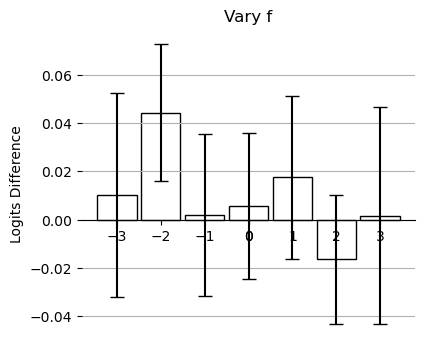

In [8]:
logits = [0.01027118484,0.04440393551,0.001956777733,0.005607300873,0.01751865251,-0.01634067286,0.001698901392]
errs = [0.03774159338,0.02538238602,0.02997454122,0.02699788342,0.03013056313,0.02394253248,0.04012568844]
errs = np.array(errs)*5

showfig(logits, diffs, errs, 'Vary f', color='tab:red')